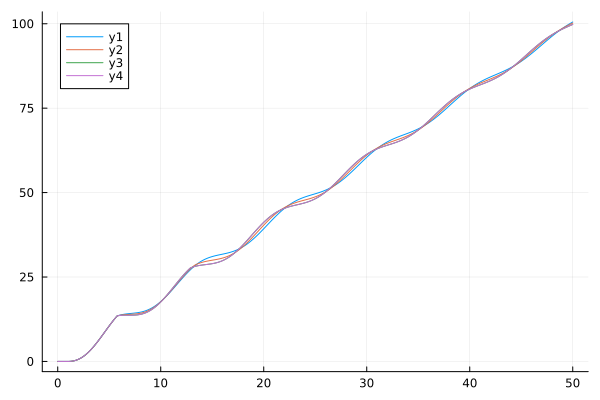

In [28]:
# Two versions of the leapfrog method is used to solve a system consisting of
# a spring attached to a "wall" moving at velocity v. A mass m is attached to 
# the other end of the spring. The mass experiences friction as it moves (it
# sits on a surface) and there is a rest friction as well that has to be overcome
# in order for the mass to move at all.

# The function accel() adds up all forces and returns the acceleration
# a rest friction force fr0 has to be overcome before the mass can move
# a very small non-zero v is treated as v=0 and then the rest friction is applied
# fr1 is a coefficient regulating the v-dependent dissipation
# The spring has native (relaxed) length lspr and can be elongated without bounds
# and compressed to length 0. The final compression force is divergent to avoid the
# spring length becoming negative (in principle a max length should also be imposed)

 function accel(x,v,t,mass,kspr,lspr,xspr,kwall,fr0,fr1)
    fspr=(xspr-x-lspr)*kspr-kwall/abs(xspr-x)^6      # force from spring
    if (abs(v)<0.000001 && abs(fspr)<fr0) 
       return 0.0
    else
       return (fspr-fr1*v)/mass
    end
 end

# The function integrate1() carries out nt steps of the standard leapfrog algorithm.
# Results are written to the file "x.dat" every wt:th steps and is also pushed to vectors.
# The step error is not very good with the leapfrog method in the presence of friction.
# - good results can still be obtained quickly with reasonable dt values.

 function integrate1(dt,wt,nt,mass,kspr,lspr,vspr,kwall,fr0,fr1)
    v=0.
    x=0.
    fi=open("x.dat","w")
    vect=Vector{Float64}()
    vecx=Vector{Float64}()
    vecv=Vector{Float64}()
    vecl=Vector{Float64}()
    for i=0:nt
        t=i*dt        
        xspr=lspr+t*vspr 
        if mod(i,wt)==0
           println(fi,t,"  ",x,"  ",xspr-x,"  ",v)           
           push!(vect,t)
           push!(vecx,x)
           push!(vecv,v)
           push!(vecl,xspr-x)
        end
        v=v+dt*accel(x,v,t,mass,kspr,lspr,xspr,kwall,fr0,fr1)
        x=x+dt*v        
    end
    close(fi)
    return vect,vecx,vecv,vecl
 end

# The function integrate2() carries out nt steps of the leapfrog algorithm with
# correction steps to better treat the damping. Otherwise same as integrate1().

 function integrate2(dt,wt,nt,mass,kspr,lspr,vspr,kwall,fr0,fr1)
    v=0.
    x=0.
    x1=0.
    fi=open("x.dat","w")
    vect=Vector{Float64}()
    vecx=Vector{Float64}()
    vecv=Vector{Float64}()
    vecl=Vector{Float64}()
    for i=0:nt
        t=i*dt        
        xspr=lspr+t*vspr 
        if mod(i,wt)==0
           println(fi,t,"  ",x,"  ",xspr-x,"  ",v)           
           push!(vect,t)
           push!(vecx,x)
           push!(vecv,v)
           push!(vecl,xspr-x)
        end
        u=v+0.5*dt*accel(x,v,t,mass,kspr,lspr,xspr,kwall,fr0,fr1)
        y=x+dt*u         # intermediate position
        u=0.5*(y-x1)/dt  # intermediate velocity, x1 is x_{n-1}
        v=v+dt*accel(x,u,t,mass,kspr,lspr,xspr,kwall,fr0,fr1)
        x1=x             # saving what will be x_{n-1} in the next step
        x=x+dt*v                
    end
    close(fi)
    return vect,vecx,vecv,vecl
 end

# Setting parameters related to the leapfrog loop
 dt=0.05      # time step
 wt=1         # write to file every wt step
 nt=1000       # number of time steps

# Setting parameters related to the system 
# - mass connected to spring, the end of which is connected to a moving wall

 mass=1.          # block mass
 kspr=0.5        # spring constant
 lspr=2.          # native spring length
 vspr=2         # constant velocity of spring end (wall); a kind of driving
 kwall=0.00001    # constant in repulsive spring compression force
 fr0=1.0           # friction force at rest
 fr1=0.05          # friction force while in motion

# Doing the integration for time step dt and then the same for dt/10,
# plotting t,x,v, or l (the latter being the spring length) after each time.

 t,x,v,l=integrate1(dt,wt,nt,mass,kspr,lspr,vspr,kwall,fr0,fr1)
 
 using Plots

 plot(t,x)

 t,x,v,l=integrate2(dt,wt,nt,mass,kspr,lspr,vspr,kwall,fr0,fr1)

 plot!(t,x)

 dt=dt/5
 wt=wt*5
 nt=nt*5

 t,x,v,l=integrate1(dt,wt,nt,mass,kspr,lspr,vspr,kwall,fr0,fr1)

 plot!(t,x)

 t,x,v,l=integrate2(dt,wt,nt,mass,kspr,lspr,vspr,kwall,fr0,fr1)

 plot!(t,x)

